In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
#import chirallag as cL
cf.reset()

Memory Reset


2021-11-30 18:54:55.800079: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-30 18:54:55.823672: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2021-11-30 18:54:55.823688: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Sean-PC
2021-11-30 18:54:55.823692: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Sean-PC
2021-11-30 18:54:55.823751: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.86.0
2021-11-30 18:54:55.823765: I tensorflow/stream_executor/cuda/cuda_diagnostics.c

NameError: name 'cL' is not defined

In [38]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))
train_x, train_y = df_pions[:-10000,:-1], (-df_pions[:-10000,-1])
val_x, val_y = df_pions[-10000:,:-1], (-df_pions[-10000:,-1])



In [39]:
unshuffled_potential_values = df_pions[:,-1].copy()
shufffled_potential_values = unshuffled_potential_values.copy()
np.random.shuffle(shufffled_potential_values)
random_mean_absolute_errro = np.mean(abs(unshuffled_potential_values-shufffled_potential_values))
print('Random mae = ',random_mean_absolute_errro)
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))

Random mae =  0.101756266626966
Mean Potential Value =  -0.13889586045126806


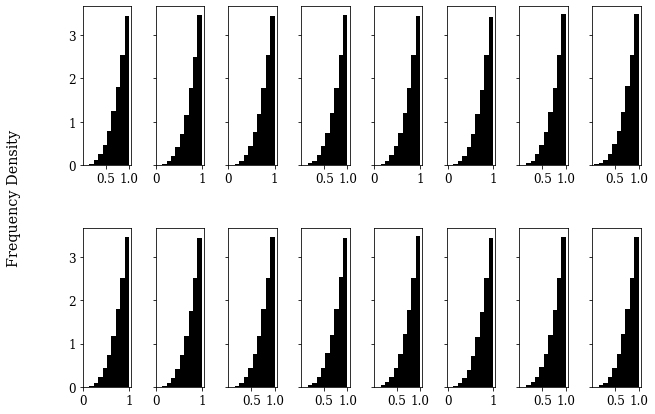

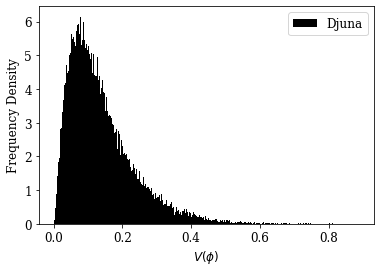

In [40]:
fig , ax = plt.subplots(2,8,sharey= True, figsize = (10,7))
plt.subplots_adjust(hspace= 0.4,wspace= 0.5)
for i in range(8):
    ax[0,i].hist(df_pions[:,i], density = True, color = 'black') 
    ax[1,i].hist(df_pions[:,8+i],density = True, color = 'black')
fig.supylabel('Frequency Density')
fig_2 = plt.figure()
plt.hist(train_y,density= True, bins = 1000, color = 'black',label=  'Djuna')

plt.xlabel('$V(\phi)$')
plt.ylabel('Frequency Density')
plt.legend()


In [41]:
opt = keras.optimizers.Adam(amsgrad= True)


In [42]:

model = models.Sequential()
model.add(layers.Dense(512,activation= 'relu',input_shape = (train_x.shape[1],),kernel_initializer= 'he_normal'))
model.add(layers.Dense(512,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(layers.Dense(512,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(layers.Dense(1))
model.compile(optimizer = opt,loss = 'mape', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               8704      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 534,529
Trainable params: 534,529
Non-trainable params: 0
_________________________________________________________________


In [43]:
epoch_num = 100

In [54]:

model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= 256 , epochs = epoch_num)

Epoch 1/100
450/450 [==============================] - 1s 3ms/step - loss: 2.7685 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 2.7685 - val_loss: 3.1378 - val_mean_absolute_error: 0.0037 - val_mean_absolute_percentage_error: 3.1378
Epoch 2/100
 77/450 [====>.........................] - ETA: 0s - loss: 2.6953 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 2.6953

KeyboardInterrupt: 

In [55]:
history = model.history


In [56]:
epoch_num = len(history.history['mean_absolute_error'])
epochs = np.arange(1,epoch_num+1)
mae = history.history['mean_absolute_error']
mape = np.array(history.history['mean_absolute_percentage_error'])
val_mae = np.array(history.history['val_mean_absolute_error'])
val_mape = np.array(history.history['val_mean_absolute_percentage_error'])
loss = history.history['loss']
val_loss = np.array(history.history['val_loss'])

In [57]:
print(np.min(val_mape)/4)

0.7844462394714355


In [58]:

val_mae_smooth = cf.exponetial_smoothing(val_mae,0.4)
val_loss_smooth = cf.exponetial_smoothing(val_loss,0.4)
val_mape_smooth = cf.exponetial_smoothing(val_mape,0.4)


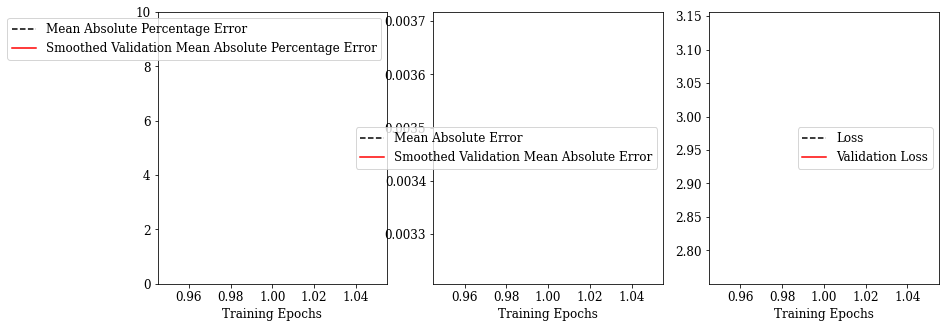

In [59]:
matplotlib.rcParams.update({'legend.fontsize': 12})
fig_3, axs  = plt.subplots(1,3, figsize= (14,5))
axs[0].plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Percentage Error')
axs[0].plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Percentage Error')
axs[0].set_xlabel('Training Epochs')
#axs[0].set_yscale('log')
axs[0].set_ylim(0,10)
axs[0].legend()

axs[1].plot(epochs,mae, c = 'black',linestyle = '--',label = 'Mean Absolute Error')
axs[1].plot(epochs,val_mae_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Error')
axs[1].set_xlabel('Training Epochs')
#axs[1].set_yscale('log')
axs[1].legend()

cut = None
axs[2].plot(epochs[:cut],loss[:cut], label = 'Loss',c = 'black',linestyle = '--')
axs[2].plot(epochs[:cut],val_loss_smooth[:cut], label = 'Validation Loss',c = 'red')
axs[2].set_xlabel('Training Epochs')
#axs[2].set_yscale('log')
axs[2].legend()

In [60]:
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))
print('')

Mean Potential Value =  -0.13889586045126806



In [51]:
fig.savefig('../Figures/Pions.png',dpi = 200)
fig_2.savefig('../Figures/potential.png',dpi = 200)
fig_3.savefig('../Figures/Inital_poc.png',dpi = 200)

FileNotFoundError: [Errno 2] No such file or directory: '../Figures/Pions.png'

In [37]:
test_data = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data_2.csv',header = None))
test_data.shape

(100000, 17)

In [34]:
#test = np.hstack((test_pi,test_dpi,test_V))
result = ((model.predict(test_data)))

In [35]:
mean = []
chunk = 100
chunk_size  = len(result)//chunk
for i in range(chunk):
    mean.append(np.mean(abs(np.array((result+test_V)/test_V))[chunk_size*i:chunk_size*(i+1)]))
mean = np.array(mean)
std = np.std(mean)
mean = np.mean(mean)
print('mean is = ', mean, 'STD is = ', std)



NameError: name 'test_V' is not defined